# Label Propagation Metrics

MSE 71989.59282302856, over 10110 frames
Display highest 5 MSE segm maps ... 


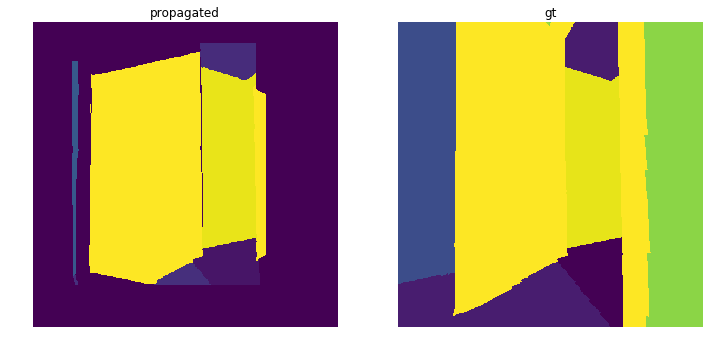

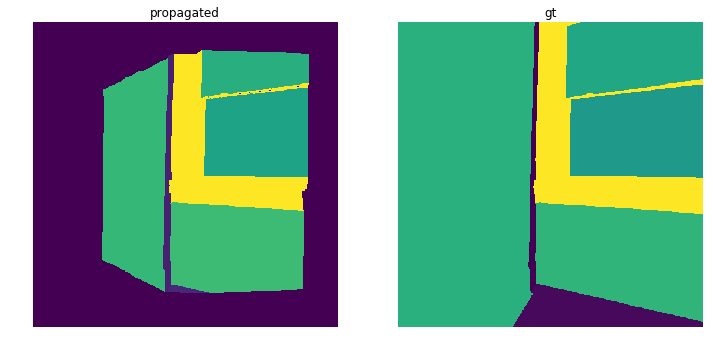

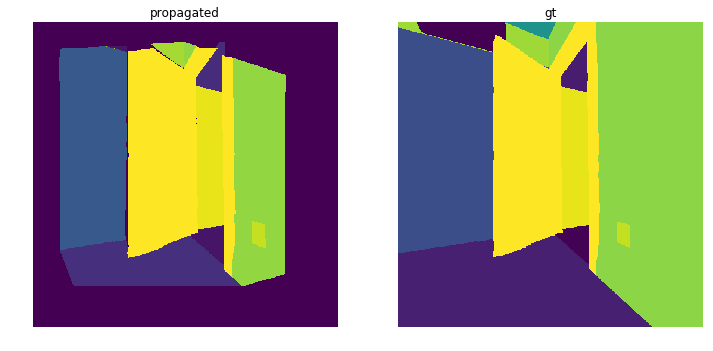

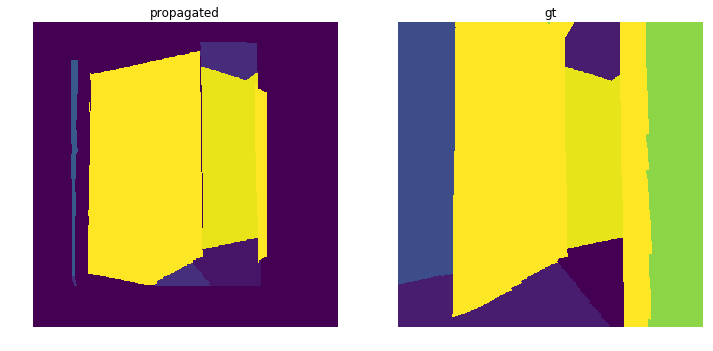

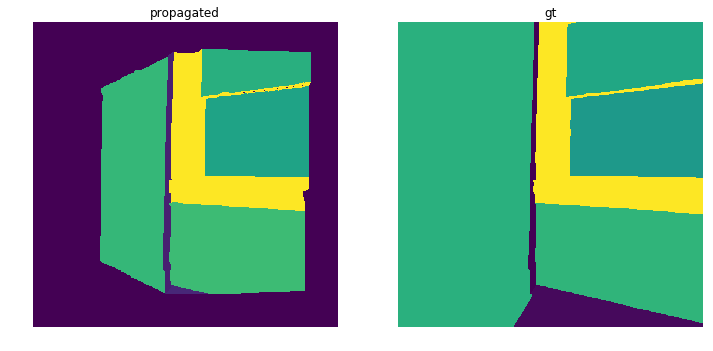

In [7]:

# Take in *.npy propagated and GT label maps

gt_seg_dir = '/checkpoint/apratik/ActiveVision/active_vision/replica_random_exploration_data/apartment_0/seg'
out_npy_dir = '/checkpoint/apratik/ActiveVision/active_vision/replica_random_exploration_data/apartment_0/pred_label_using_traj'

import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

prop_seg = os.listdir(out_npy_dir)
mse = {}
cnt = 0
for x in prop_seg:
    img = int(x.split('.')[0])
    cnt += 1
    prop_data = np.load(os.path.join(out_npy_dir, x)).astype(np.uint8)
    gt_data = np.load(os.path.join(gt_seg_dir, x)).astype(np.uint8)
    mse[img] = (np.square(prop_data-gt_data)).mean(axis=None)

print("MSE {}, over {} frames".format(sum(mse.values()), cnt))

print("Display highest 5 MSE segm maps ... ")
for k, v in sorted(mse.items(), key = lambda item: item[1], reverse=True)[:5]:
    filename = "{:05d}.npy".format(k)
    prop_data = np.load(os.path.join(out_npy_dir, filename)).astype(np.uint8)
    gt_data = np.load(os.path.join(gt_seg_dir, filename)).astype(np.uint8)
    
    plt.figure(figsize=(12 , 8))
    ax = plt.subplot(1, 2, 1)
    ax.axis('off')
    ax.set_title('propagated')
    plt.imshow(prop_data)

    ax = plt.subplot(1, 2, 2)
    ax.axis('off')
    ax.set_title("gt")
    plt.imshow(gt_data)

    plt.show()        
